In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/pokemon.csv


In [19]:
df = pd.read_csv("/kaggle/input/pokemon/pokemon.csv")
df.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


In [20]:
df.generation.unique()



array([1, 2, 3, 4, 5, 6, 7])

In [21]:
#df.abilities.unique()

In [22]:
df.isna().sum()



abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [23]:
df.shape



(801, 41)

In [24]:
# creating dataframe for columns to vizuallize
data = df[['type1','type2','attack','defense','speed']]
data


,type1,type2,attack,defense,speed
0,grass,poison,49,49,45
1,grass,poison,62,63,60
2,grass,poison,100,123,80
3,fire,NaN,52,43,65
4,fire,NaN,64,58,80
...,...,...,...,...,...
796,steel,flying,101,103,61
797,grass,steel,181,131,109
798,dark,dragon,101,53,43
799,psychic,NaN,107,101,79


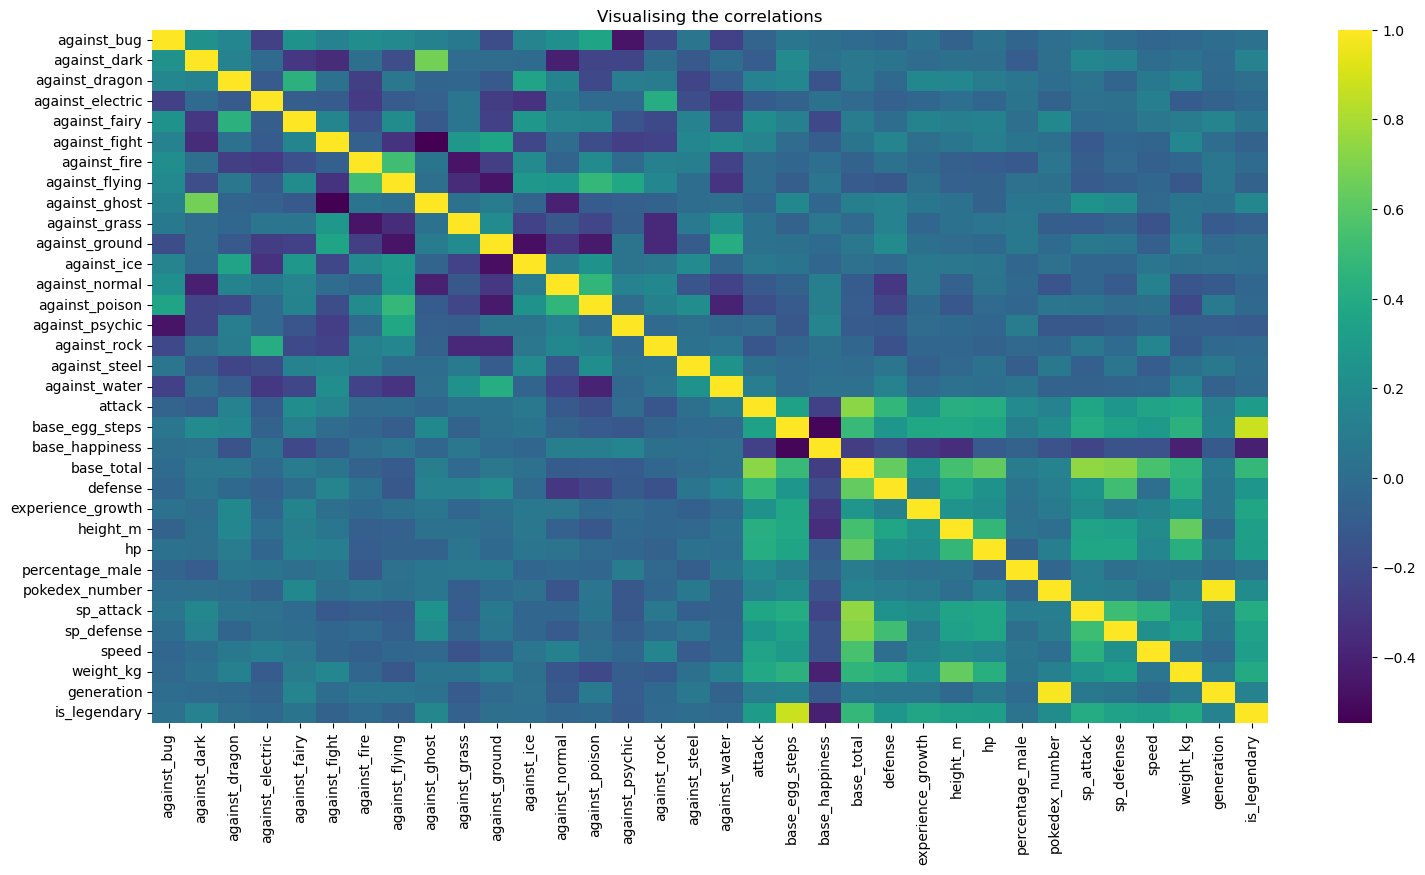

In [25]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),cmap='viridis')
plt.title('Visualising the correlations')
plt.show()

<Figure size 2000x2000 with 0 Axes>

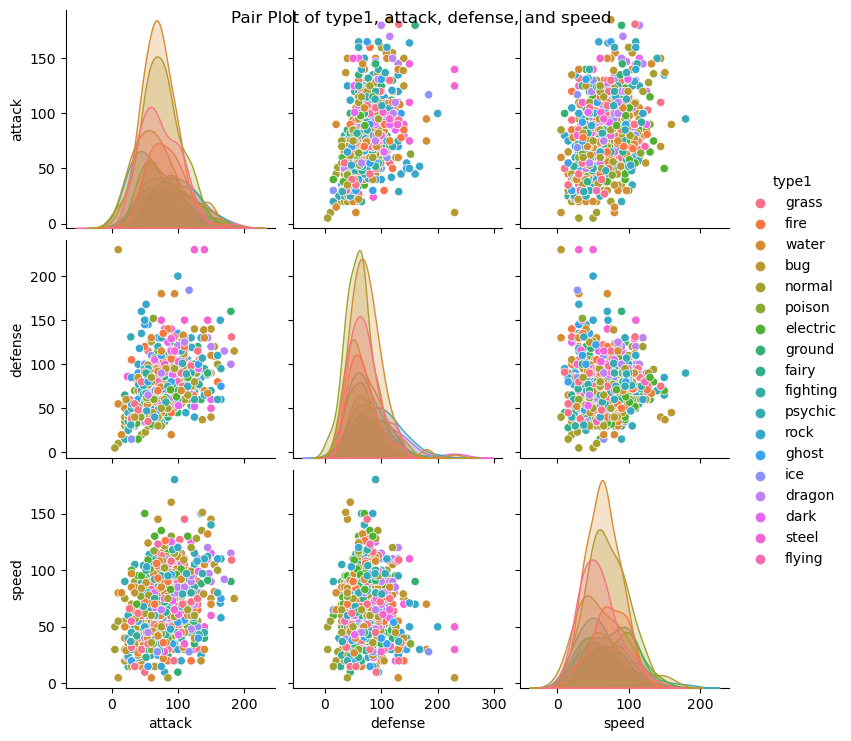

In [26]:
temp = df[['type1', 'type2', 'attack', 'defense', 'speed']]
plt.figure(figsize=(20,20))
sns.pairplot(temp,hue='type1')
plt.suptitle('Pair Plot of type1, attack, defense, and speed')
plt.show()

<Figure size 2000x2000 with 0 Axes>

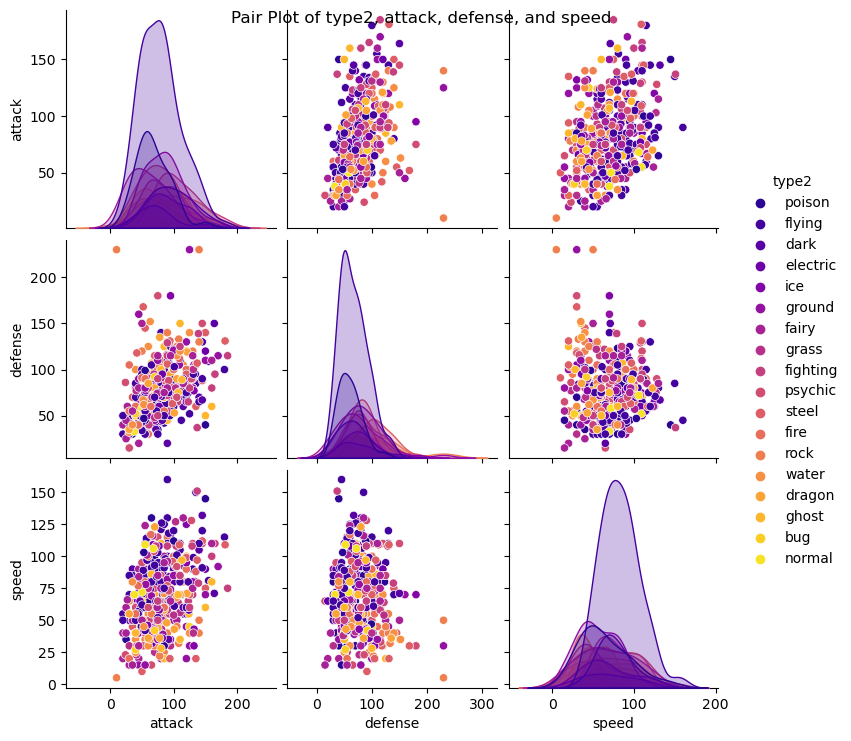

In [27]:
plt.figure(figsize=(20,20))
sns.pairplot(temp,hue='type2',palette='plasma')
plt.suptitle('Pair Plot of type2, attack, defense, and speed')
plt.show()

# Task 2

Most Common Pokémon Type: water


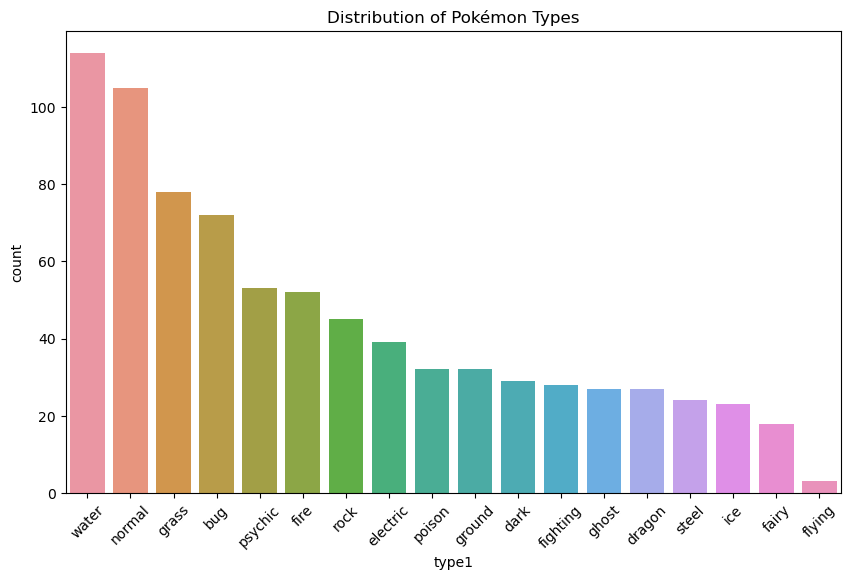

In [28]:
# 1. Distribution of Pokémon types and the most common type
type_counts = df['type1'].value_counts()
most_common_type = type_counts.idxmax()
print("Most Common Pokémon Type:", most_common_type)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type1', order=type_counts.index)
plt.title("Distribution of Pokémon Types")
plt.xticks(rotation=45)
plt.show()

In [29]:

print(df.columns)


Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')


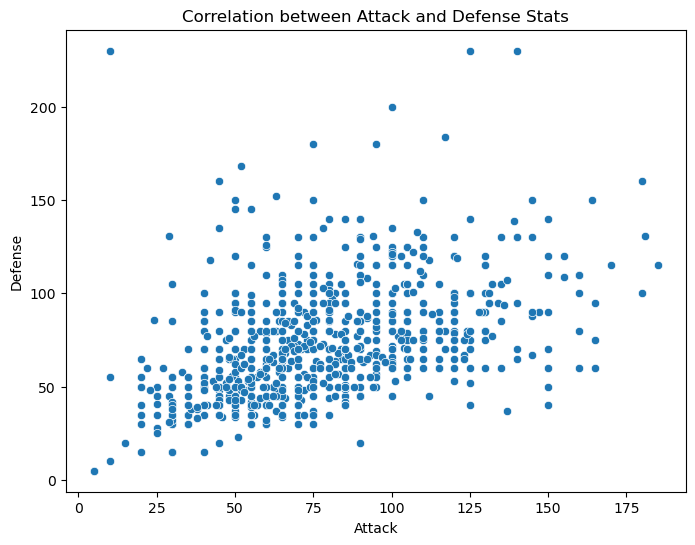

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='attack', y='defense')
plt.title("Correlation between Attack and Defense Stats")
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

In [45]:
# # Pair Plot of type1, attack, defense, and speed
# plt.figure(figsize=(20, 20))
# sns.pairplot(data, hue='type1')
# plt.suptitle('Pair Plot of type1, attack, defense, and speed')
# plt.show()

# # Pair Plot of type2, attack, defense, and speed
# plt.figure(figsize=(20, 20))
# sns.pairplot(data, hue='type2', palette='plasma')
# plt.suptitle('Pair Plot of type2, attack, defense, and speed')
# plt.show()


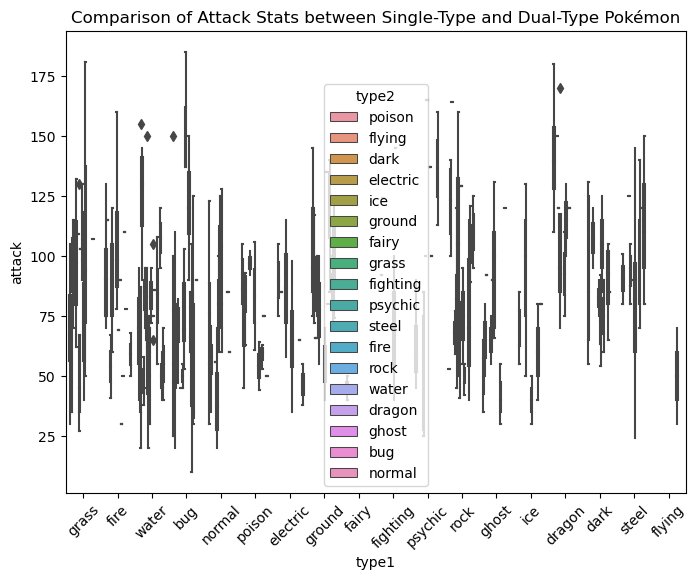

In [46]:
# 2. Compare Attack and Defense stats of single-type and dual-type Pokémon
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='type1', y='attack', hue='type2')
plt.title("Comparison of Attack Stats between Single-Type and Dual-Type Pokémon")
plt.xticks(rotation=45)
plt.legend(title='type2')
plt.show()


Text(0.5, 1.0, 'Type 1 Pokemons Distribution')

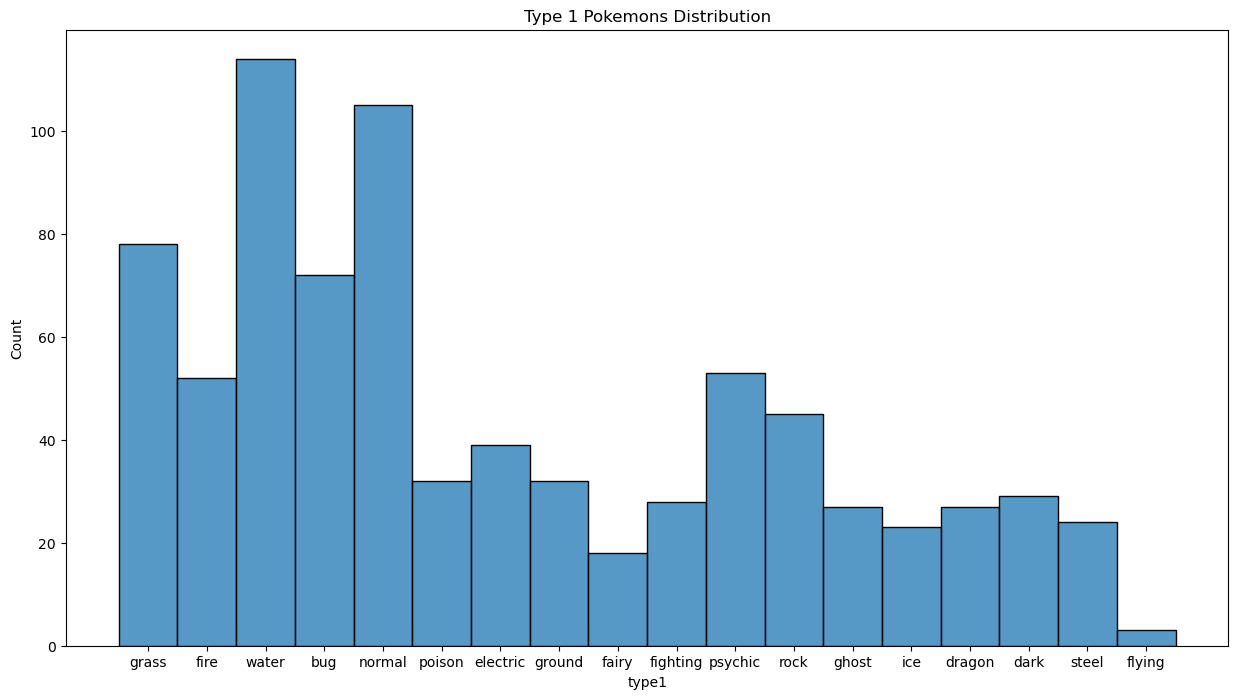

In [35]:
# What are the different primary and secondary type of Pokemon's and how many of each type is there in the dataset? [Visualize]
plt.figure(figsize=(15,8)) #FOR PRIMARY TYPE i.e TYPE 1
sns.histplot(x='type1',data=df)
plt.title('Type 1 Pokemons Distribution')

Text(0.5, 1.0, 'Type 2 Pokemons Distribution')

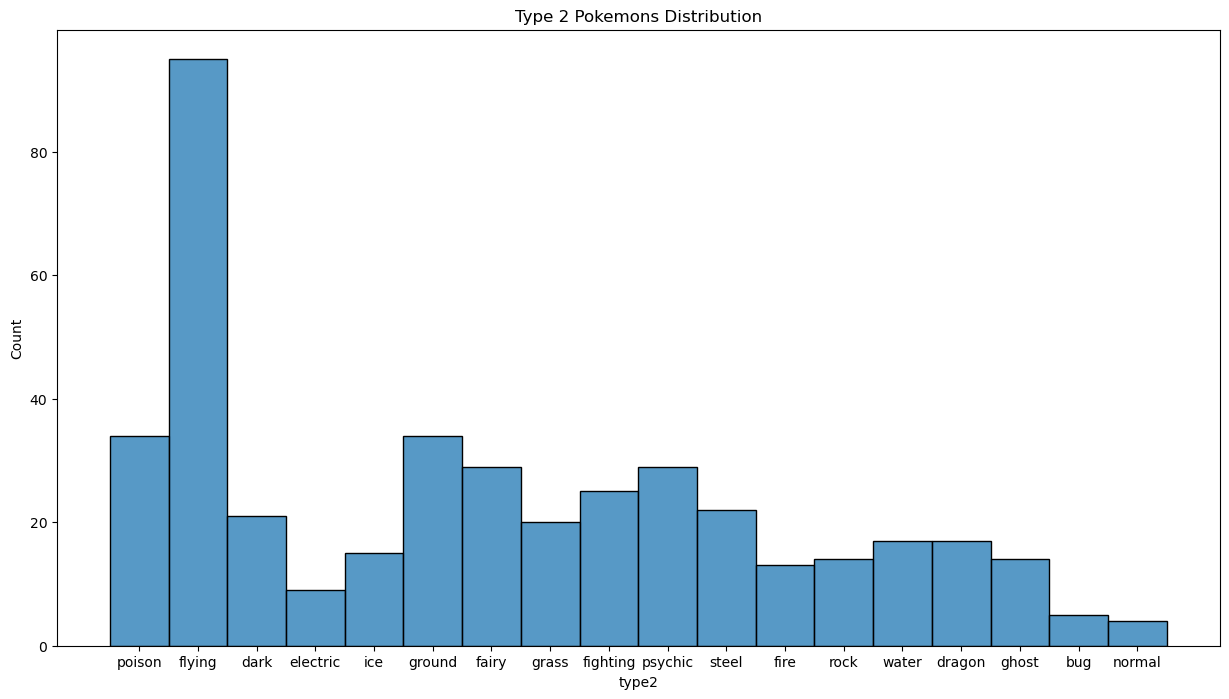

In [37]:
plt.figure(figsize=(15,8)) #FOR SECONDARY TYPE i.e TYPE 2
sns.histplot(x='type2',data=df)
plt.title('Type 2 Pokemons Distribution')

Text(0.5, 1.0, 'Heights for each type 2 Pokemon')

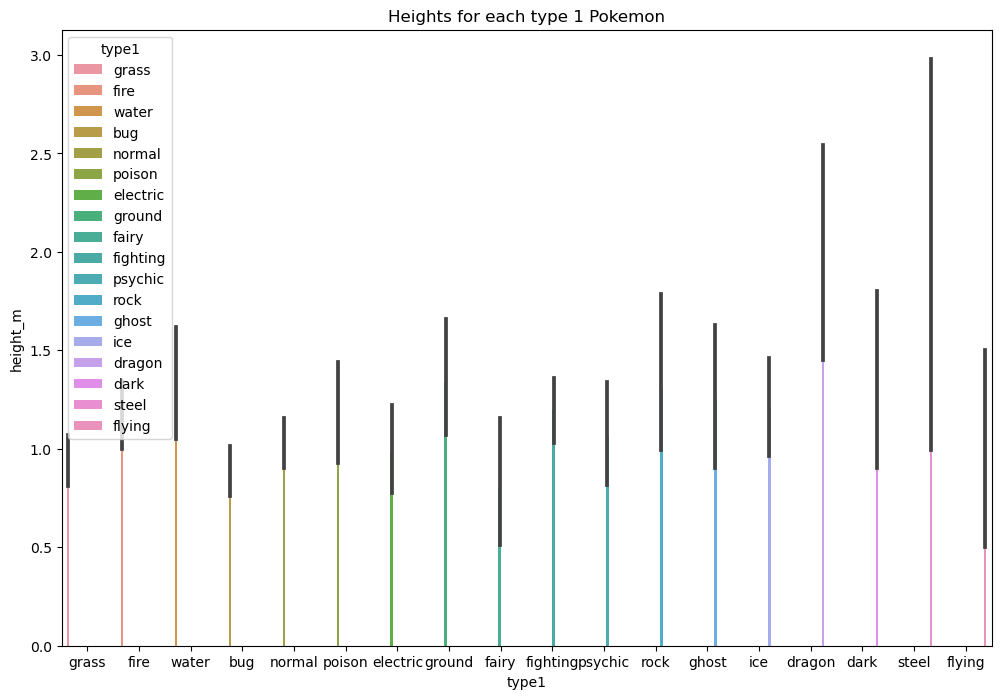

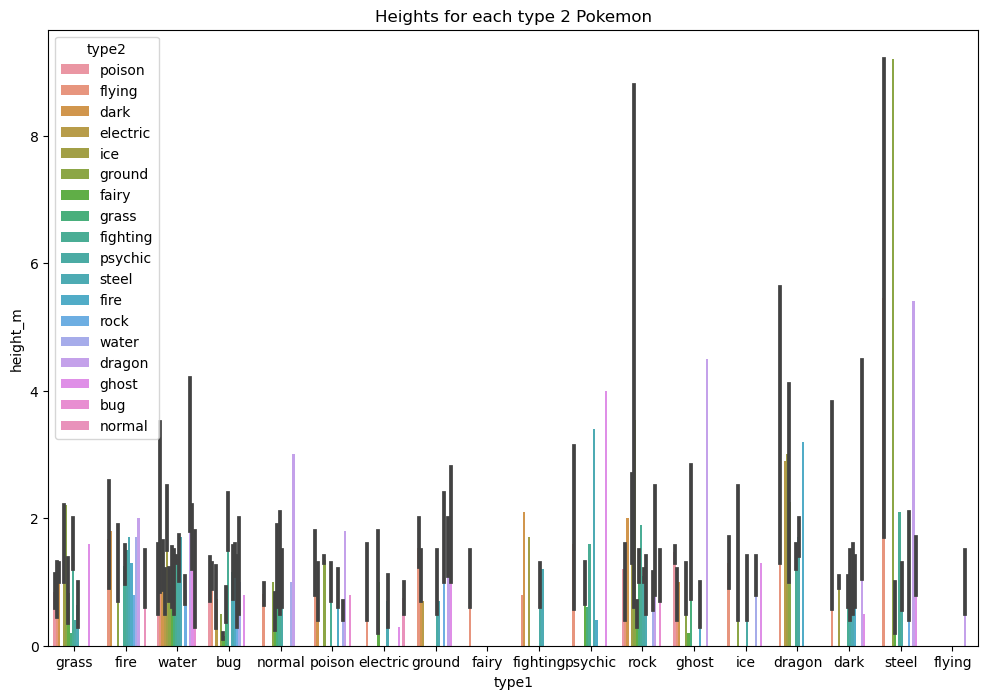

In [44]:
# Estimate the central tendency of heights for each type 1 pokemon ?
plt.figure(figsize=(12,8))
sns.barplot(x='type1',y='height_m',data=df,hue='type1')
plt.title('Heights for each type 1 Pokemon')
plt.figure(figsize=(12,8))
sns.barplot(x='type1',y='height_m',data=df,hue='type2')
plt.title('Heights for each type 2 Pokemon')

Text(0.5, 1.0, 'Type 1 Pokemons against fire & water')

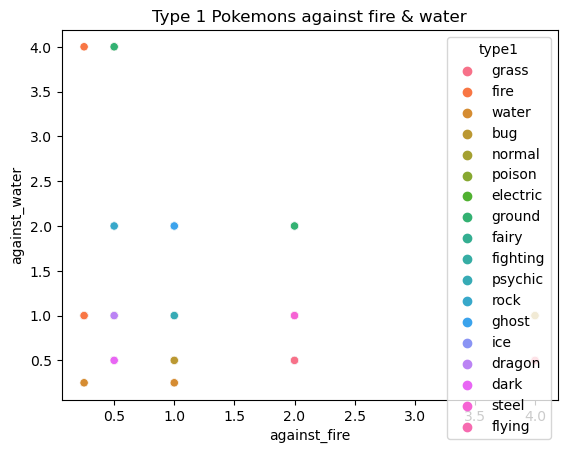

In [42]:
#Compare the different type 1 and type 2 pokemons against fire and water
sns.scatterplot(x='against_fire',y='against_water',data=df,hue='type1') #FOR TYPE1
plt.title('Type 1 Pokemons against fire & water')



Text(0.5, 1.0, 'Type 1 Pokemons against fire & water')

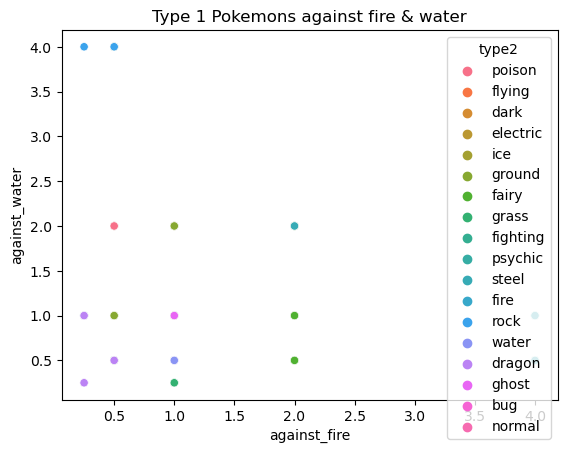

In [43]:
#Compare the different type 1 and type 2 pokemons against fire and water
sns.scatterplot(x='against_fire',y='against_water',data=df,hue='type2') #FOR TYPE1
plt.title('Type 1 Pokemons against fire & water')

